In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

In [4]:
PALETTE = OrderedDict({
    "Gender": {
        "Female": "#4C78A8",  
        "Male":   "#F58518",  
        "Other":  "#54A24B",  
    },
    "Attachment": {
        "Secure":   "#4C78A8",
        "Insecure": "#E45756",  
    }
})

COL_GENDER = "Gender"
COL_ATTACH = "Attachment"
COL_AGE1   = "age_baby_1"
COL_AGE2   = "age_baby_2"

In [5]:
def add_panel_label(ax, label):
    ax.text(-0.08, 1.08, label, transform=ax.transAxes,
            fontsize=13, fontweight="bold", va="top", ha="right")


In [6]:
def bar_counts(ax, series, colors_map, title, xlabel=None):
    counts = series.value_counts(dropna=False)
    idx = counts.index.tolist()
    vals = counts.values
    colors = [colors_map.get(k, "#888888") for k in idx]
    ax.bar(idx, vals, color=colors, edgecolor="black", linewidth=0.6)
    ax.set_title(title, fontsize=12)
    if xlabel:
        ax.set_xlabel(xlabel, fontsize=10)
    ax.set_ylabel("Count", fontsize=10)
    ax.tick_params(axis='x', rotation=0)

In [7]:
def grouped_bar_counts(ax, df, cat_main, cat_secondary, colors_map, title, xlabel=None):
    tab = pd.crosstab(df[cat_secondary], df[cat_main])
    cols = list(tab.columns)
    x = np.arange(len(tab.index))
    width = 0.8 / max(len(cols), 1)

    for i, g in enumerate(cols):
        y = tab[g].values
        ax.bar(x + i*width - (len(cols)-1)*width/2, y,
               width=width,
               label=str(g),
               color=PALETTE["Gender"].get(g, "#888888"),
               edgecolor="black", linewidth=0.6)
    ax.set_xticks(x)
    ax.set_xticklabels(tab.index)
    ax.set_ylabel("Count", fontsize=10)
    if xlabel:
        ax.set_xlabel(xlabel, fontsize=10)
    ax.set_title(title, fontsize=12)
    ax.legend(title=cat_main, fontsize=9, title_fontsize=9, frameon=False)

In [8]:
def overlay_hist(ax, s1, s2, label1, label2, color1, color2, title, bins="auto"):
    s1 = s1.dropna()
    s2 = s2.dropna()
    data_all = pd.concat([s1, s2], axis=0)
    if bins == "auto":
        bins = np.histogram_bin_edges(data_all, bins="auto")
    ax.hist(s1, bins=bins, alpha=0.55, label=label1, color=color1, edgecolor="black", linewidth=0.3)
    ax.hist(s2, bins=bins, alpha=0.55, label=label2, color=color2, edgecolor="black", linewidth=0.3)
    ax.set_title(title, fontsize=12)
    ax.set_xlabel("Age (months)", fontsize=10)
    ax.set_ylabel("Count", fontsize=10)
    ax.legend(fontsize=9, frameon=False)

In [9]:
def grouped_boxplot(ax, data, x_groups, hue_groups, value_col, colors_map, title, xlabel=None):

    levels_x = list(pd.Series(x_groups).dropna().unique())
    levels_h = list(pd.Series(hue_groups).dropna().unique())

    plot_data = []
    labels = []
    colors = []
    for x_val in levels_x:
        for h_val in levels_h:
            mask = (x_groups == x_val) & (hue_groups == h_val)
            vals = data[mask].dropna().values
            plot_data.append(vals)
            labels.append(f"{x_val}\n{h_val}")
            c = (PALETTE["Attachment"].get(str(h_val))
                 if (h_val in PALETTE["Attachment"]) else PALETTE["Gender"].get(str(h_val), "#888888"))
            colors.append(c)

    n_x = len(levels_x)
    n_h = len(levels_h)
    group_width = 0.8
    box_width = group_width / max(n_h, 1)
    positions = []
    for i_x in range(n_x):
        base = i_x * (n_h + 1)  
        for j_h in range(n_h):
            positions.append(base + j_h)

    bp = ax.boxplot(plot_data, positions=positions, widths=box_width, patch_artist=True,
                    showfliers=False, medianprops=dict(color="black", linewidth=1.3))

    for patch, color in zip(bp["boxes"], colors):
        patch.set_facecolor(color)
        patch.set_edgecolor("black")
        patch.set_linewidth(0.8)

    ax.set_title(title, fontsize=12)
    if xlabel:
        ax.set_xlabel(xlabel, fontsize=10)
    ax.set_ylabel("Age (months)", fontsize=10)

    tick_pos = []
    tick_lab = []
    for i_x, x_val in enumerate(levels_x):
        center = i_x * (n_h + 1) + (n_h - 1) / 2.0
        tick_pos.append(center)
        tick_lab.append(str(x_val))
    ax.set_xticks(tick_pos)
    ax.set_xticklabels(tick_lab)

    handles = []
    for h_val in levels_h:
        c = (PALETTE["Attachment"].get(str(h_val))
             if (h_val in PALETTE["Attachment"]) else PALETTE["Gender"].get(str(h_val), "#888888"))
        handles.append(plt.Rectangle((0, 0), 1, 1, facecolor=c, edgecolor="black"))
    ax.legend(handles, [str(h) for h in levels_h], title="Group", fontsize=9, title_fontsize=9, frameon=False)


In [2]:
df_data = pd.read_csv("../processed_data/1_processed_data_IgA.csv")
df_data.head(5)

,ID,Gender,age_baby_1,age_baby_2,age_baby_5,sIgA_Average_Morning,sIgA_Average_Afternoon,sIgA_Average_Difference,sIgA_Average_Morning_log,sIgA_Average_Afternoon_log,sIgA_Average_Difference_log,Attachment
0,1,Male,5,7.0,15.0,21.765240,28.368055,6.602815,3.077296,3.338237,0.260941,Insecure
1,4,Male,10,10.0,16.0,28.473065,50.881961,22.408896,3.348951,3.687484,0.338533,Secure
2,5,Female,5,NaN,14.0,161.424693,46.867951,-114.556742,5.084039,3.847334,-1.236705,Secure
3,7,Female,12,12.0,18.0,24.173487,35.942378,14.343241,3.179553,3.581917,0.402364,Insecure
4,11,Male,8,9.0,NaN,78.013279,382.715268,345.590046,4.196295,5.947291,1.750996,Insecure


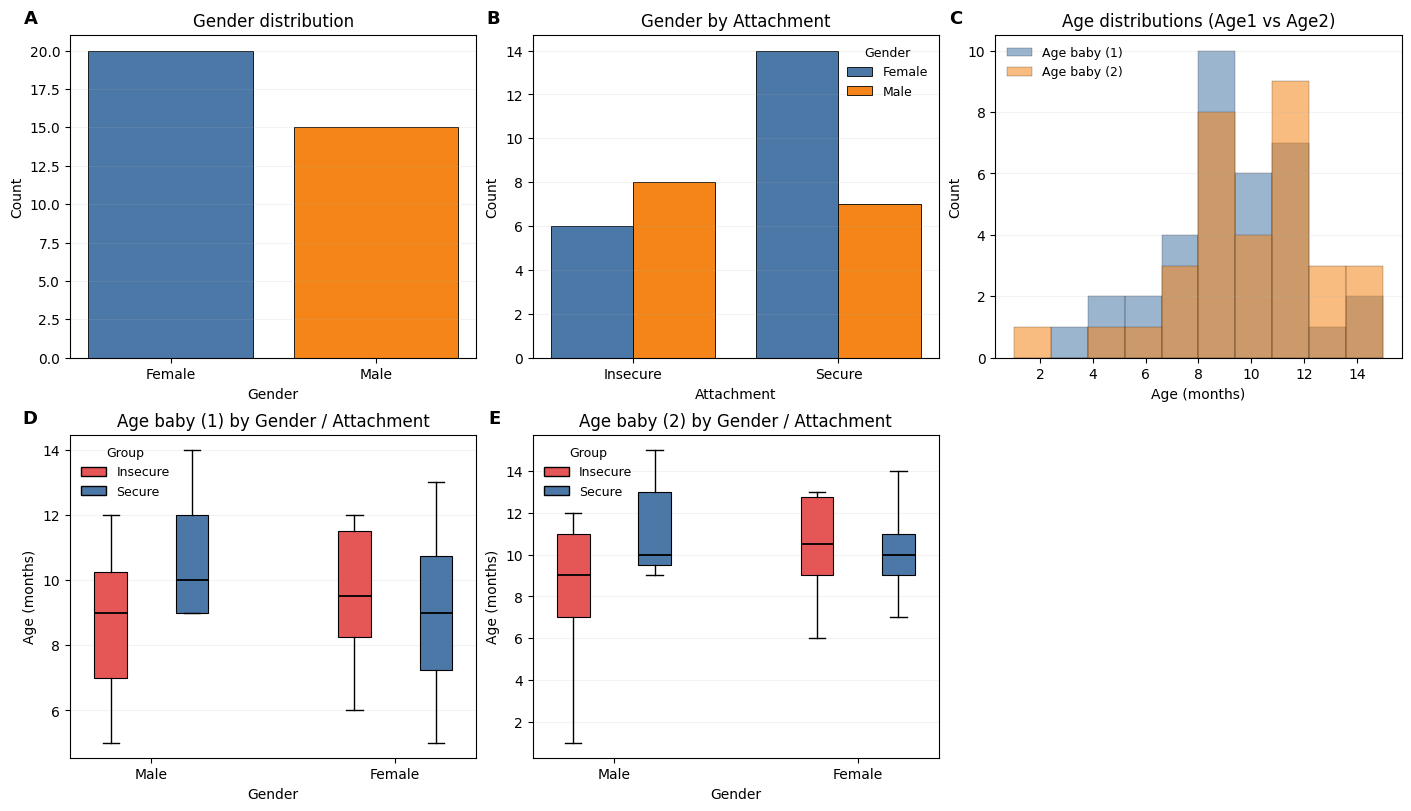

In [11]:


for col in [COL_GENDER, COL_ATTACH]:
    if col in df_data.columns:
        df_data[col] = df_data[col].astype(str).str.strip().str.title()


fig, axes = plt.subplots(2, 3, figsize=(14, 8), constrained_layout=True)
for ax in axes.flat:
    ax.grid(axis="y", alpha=0.15)

# Panel A — Gender
axA = axes[0, 0]
add_panel_label(axA, "A")
if COL_GENDER in df_data.columns:
    bar_counts(axA, df_data[COL_GENDER], PALETTE["Gender"], title="Gender distribution", xlabel="Gender")
else:
    axA.set_visible(False)

# Panel B — Gender by Attachment
axB = axes[0, 1]
add_panel_label(axB, "B")
if all(c in df_data.columns for c in [COL_GENDER, COL_ATTACH]):
    grouped_bar_counts(axB, df_data.dropna(subset=[COL_GENDER, COL_ATTACH]),
                       cat_main=COL_GENDER, cat_secondary=COL_ATTACH,
                       colors_map=PALETTE["Gender"], title="Gender by Attachment", xlabel="Attachment")
else:
    axB.set_visible(False)

# Panel C — Age1 vs Age2 (hist overlay)
axC = axes[0, 2]
add_panel_label(axC, "C")
if all(c in df_data.columns for c in [COL_AGE1, COL_AGE2]):
    overlay_hist(axC,
                 df_data[COL_AGE1], df_data[COL_AGE2],
                 label1="Age baby (1)", label2="Age baby (2)",
                 color1="#4C78A8", color2="#F58518",
                 title="Age distributions (Age1 vs Age2)")
else:
    axC.set_visible(False)

# Panel D — Age1 by Sex/Attachment (boxplot)
axD = axes[1, 0]
add_panel_label(axD, "D")
if all(c in df_data.columns for c in [COL_AGE1, COL_GENDER, COL_ATTACH]):
    grouped_boxplot(axD,
                    data=df_data[COL_AGE1],
                    x_groups=df_data[COL_GENDER],
                    hue_groups=df_data[COL_ATTACH],
                    value_col=COL_AGE1,
                    colors_map=PALETTE,
                    title="Age baby (1) by Gender / Attachment",
                    xlabel="Gender")
else:
    axD.set_visible(False)

# Panel E — Age2 by Sex/Attachment (boxplot)
axE = axes[1, 1]
add_panel_label(axE, "E")
if all(c in df_data.columns for c in [COL_AGE2, COL_GENDER, COL_ATTACH]):
    grouped_boxplot(axE,
                    data=df_data[COL_AGE2],
                    x_groups=df_data[COL_GENDER],
                    hue_groups=df_data[COL_ATTACH],
                    value_col=COL_AGE2,
                    colors_map=PALETTE,
                    title="Age baby (2) by Gender / Attachment",
                    xlabel="Gender")
else:
    axE.set_visible(False)

axes[1, 2].axis("off")

plt.savefig("../tmp_figures/statistical_analysis_eda.png", dpi=300, bbox_inches="tight")
plt.show()



In [12]:
df_data.columns

Index(['ID', 'Gender', 'age_baby_1', 'age_baby_2', 'age_baby_5',
       'sIgA_Average_Morning', 'sIgA_Average_Afternoon',
       'sIgA_Average_Difference', 'sIgA_Average_Morning_log',
       'sIgA_Average_Afternoon_log', 'sIgA_Average_Difference_log',
       'Attachment'],
      dtype='object')

In [14]:
df_data.describe().to_csv("tmp.csv")

In [15]:
df_data_cortisol = pd.read_csv("../processed_data/2_processed_data_cortisol.csv")
df_data_cortisol.head()

,ID,Cortisol (pg/mL),Gender,sIgA_Average_Morning,sIgA_Average_Afternoon,sIgA_Average_Difference,sIgA_Average_Morning_log,sIgA_Average_Afternoon_log,sIgA_Average_Difference_log,Attachment
0,16.0,3.59,Female,57.476955,73.891936,16.414980,3.974519,4.178677,0.204158,Secure
1,32.0,22.75,Male,32.565326,44.611069,12.045743,3.417520,3.749981,0.332461,Secure
2,1.0,5.62,Male,21.765240,28.368055,6.602815,3.077296,3.338237,0.260941,Insecure
3,7.0,1.83,Female,24.173487,35.942378,14.343241,3.179553,3.581917,0.402364,Insecure
4,5.0,2.28,Female,161.424693,46.867951,-114.556742,5.084039,3.847334,-1.236705,Secure


In [16]:
df_data_cortisol.describe().round(2).to_csv("tmp.csv")